<a href="https://colab.research.google.com/github/sahariml/Lyapunov_diag_bif_3D-PLM-Map/blob/main/Stat_Ricker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

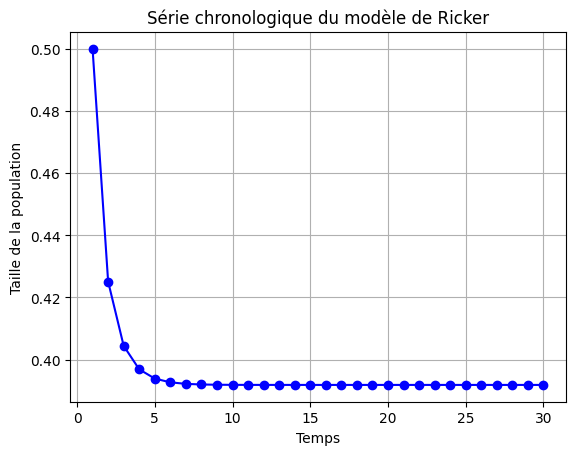

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ricker_model_plot():
    # Paramètres du modèle
    N0 = 0.5       # Taille initiale de la population
    R = 1.8         # Taux de croissance intrinsèque
    delta = 1.50   # Capacité de charge
    time_steps = 30  # Nombre de pas de temps
    output_file = 'ricker_model_data.csv'  # Nom du fichier de sortie

    # Initialisation de la série chronologique
    N = np.zeros(time_steps)
    N[0] = N0

    # Génération de la série chronologique
    for t in range(1, time_steps):
        N[t] = R * N[t-1] * np.exp(-delta * N[t-1])

    # Enregistrement des données dans un fichier
    data = pd.DataFrame({'Time': np.arange(1, time_steps + 1), 'Population': N})
    data.to_csv(output_file, index=False)

    # Tracé de la série chronologique
    plt.figure()
    plt.plot(np.arange(1, time_steps + 1), N, '-o', color='b')
    plt.title('Série chronologique du modèle de Ricker')
    plt.xlabel('Temps')
    plt.ylabel('Taille de la population')
    plt.grid(True)
    plt.show()

# Appel de la fonction pour générer et tracer la série chronologique
ricker_model_plot()


# Nouvelle section

<ipython-input-12-acfaaefeb7dc>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("ricker_model_data.csv", parse_dates=['Time'])


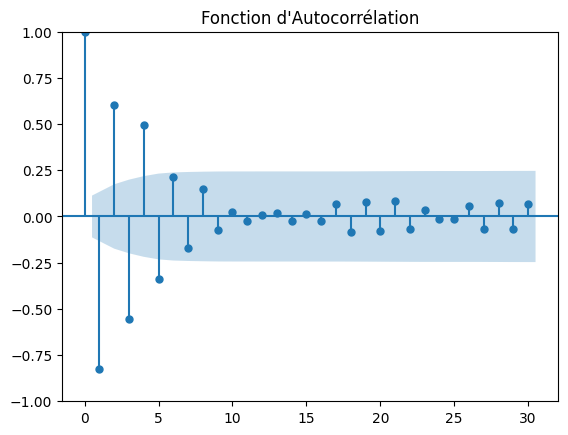

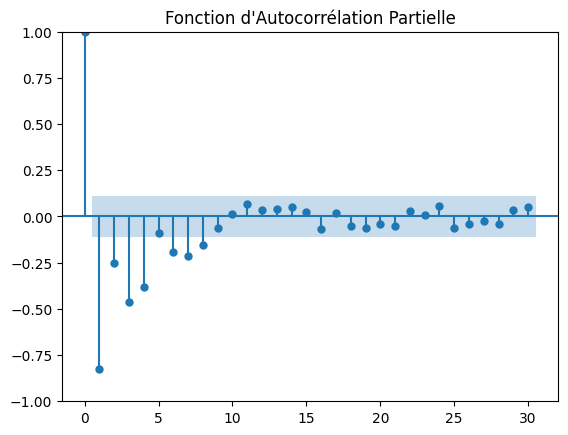

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Lire le fichier CSV avec une colonne de dates nommée 'date' et une colonne de valeurs nommée 'value'
data = pd.read_csv("ricker_model_data.csv", parse_dates=['Time'])

# Définir la colonne de dates comme index
data.set_index('Time', inplace=True)

# Supposons que la colonne de votre série temporelle s'appelle 'value'
x_series = data['Population']

# Calcul et tracé de l'ACF
plot_acf(x_series, lags=30)
plt.title("Fonction d'Autocorrélation")

# Calcul et tracé de la PACF
plot_pacf(x_series, lags=30)
plt.title("Fonction d'Autocorrélation Partielle")
plt.show()

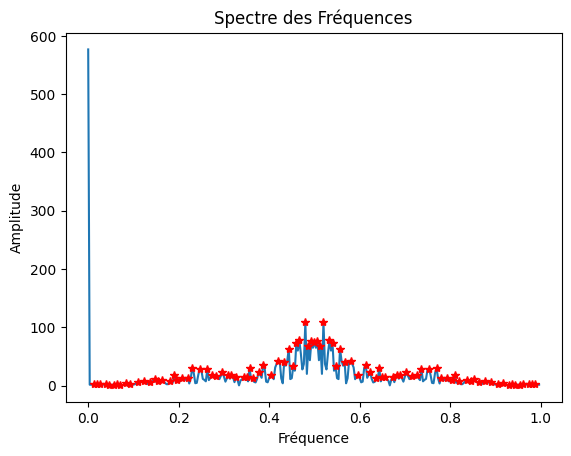

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Lire le fichier CSV
data = pd.read_csv('ricker_model_data.csv')

# Supposons que la colonne de votre série temporelle s'appelle 'value'
x = data['Population'].values

# Appliquer la Transformée de Fourier
Y = fft(x)

# Calculer le nombre de points
n = len(x)

# Calculer les fréquences correspondantes
f = np.arange(n) * (1 / n)

# Calculer l'amplitude
amplitude = np.abs(Y)

# Trouver les fréquences dominantes (par exemple, les pics dans le spectre)
peaks, _ = find_peaks(amplitude)
dominant_frequencies = f[peaks]

# Tracer le spectre des fréquences
plt.figure()
plt.plot(f, amplitude)
plt.title('Spectre des Fréquences')
plt.xlabel('Fréquence')
plt.ylabel('Amplitude')

# Marquer les fréquences dominantes
plt.plot(dominant_frequencies, amplitude[peaks], 'r*')
plt.show()


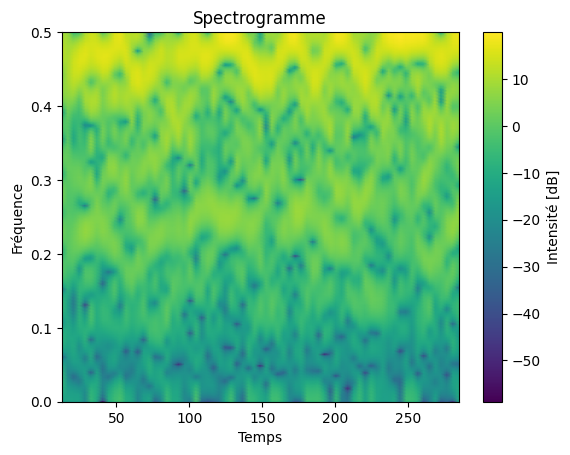

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Lire le fichier CSV
data = pd.read_csv('ricker_model_data.csv')

# Supposons que la colonne de votre série temporelle s'appelle 'value'
x = data['Population'].values

# Paramètres pour le spectrogramme
window = 25  # Taille de la fenêtre de segment
noverlap = 21  # Nombre de points de recouvrement entre les segments
nfft = 512  # Nombre de points pour la transformée de Fourier

# Calculer le spectrogramme
f, t, Sxx = spectrogram(x, nperseg=window, noverlap=noverlap, nfft=nfft)

# Visualiser le spectrogramme
plt.figure()
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogramme')
plt.xlabel('Temps')
plt.ylabel('Fréquence')
plt.colorbar(label='Intensité [dB]')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


def test_dickey_fuller(series):
    """
    Applique le test de Dickey-Fuller sur une série temporelle.
    """
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("La série est stationnaire.")
    else:
        print("La série n'est pas stationnaire.")

# Lire le fichier CSV
data = pd.read_csv('ricker_model_data.csv')

# Supposons que la colonne de votre série temporelle s'appelle 'Population'
series = data['Population'].values


# Appliquer le test de Dickey-Fuller
print("Test de Dickey-Fuller:")
test_dickey_fuller(series)


Test de Dickey-Fuller:
ADF Statistic: -11.903784563726223
p-value: 5.496589798385196e-22
Critical Values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}
La série est stationnaire.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss

def test_kpss(series):
    """
    Applique le test de KPSS sur une série temporelle.
    """
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[3])
    if result[1] > 0.05:
        print("La série est stationnaire.")
    else:
        print("La série n'est pas stationnaire.")

# Lire le fichier CSV
data = pd.read_csv('ricker_model_data.csv')

# Supposons que la colonne de votre série temporelle s'appelle 'Population'
series = data['Population'].values


# Appliquer le test de KPSS
print("Test de KPSS:")
test_kpss(series)


Test de KPSS:
KPSS Statistic: 0.04301942047126423
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La série est stationnaire.


<ipython-input-8-3b9e97fe00fe>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss


def test_dickey_fuller(series):
    """
    Applique le test de Dickey-Fuller sur une série temporelle.
    """
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("La série est stationnaire.")
    else:
        print("La série n'est pas stationnaire.")

def test_kpss(series):
    """
    Applique le test de KPSS sur une série temporelle.
    """
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[3])
    if result[1] > 0.05:
        print("La série est stationnaire.")
    else:
        print("La série n'est pas stationnaire.")

# Lire le fichier CSV
data = pd.read_csv('ricker_model_data.csv')

# Supposons que la colonne de votre série temporelle s'appelle 'Population'
series = data['Population'].values


# Appliquer le test de Dickey-Fuller
print("Test de Dickey-Fuller:")
test_dickey_fuller(series)

# Appliquer le test de KPSS
print("Test de KPSS:")
test_kpss(series)

# Identification du meilleur modèle ARIMA en utilisant AIC et BIC
p = d = q = range(0, 3)
best_aic = np.inf
best_bic = np.inf
best_model_aic = None
best_model_bic = None

for i in p:
    for j in d:
        for k in q:
            try:
                model = ARIMA(series, order=(i, j, k)).fit()
                aic = model.aic
                bic = model.bic
                if aic < best_aic:
                    best_aic = aic
                    best_model_aic = (i, j, k)
                if bic < best_bic:
                    best_bic = bic
                    best_model_bic = (i, j, k)
            except:
                continue

print(f"Meilleur modèle ARIMA basé sur AIC: {best_model_aic} avec AIC = {best_aic}")
print(f"Meilleur modèle ARIMA basé sur BIC: {best_model_bic} avec BIC = {best_bic}")


Test de Dickey-Fuller:
ADF Statistic: -4.780103620355537
p-value: 5.93581376550512e-05
Critical Values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}
La série est stationnaire.
Test de KPSS:
KPSS Statistic: 0.4187581825741501
p-value: 0.06906974889045255
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La série est stationnaire.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

Meilleur modèle ARIMA basé sur AIC: (1, 1, 2) avec AIC = -183.71719620658018
Meilleur modèle ARIMA basé sur BIC: (1, 2, 0) avec BIC = -180.10453468197667


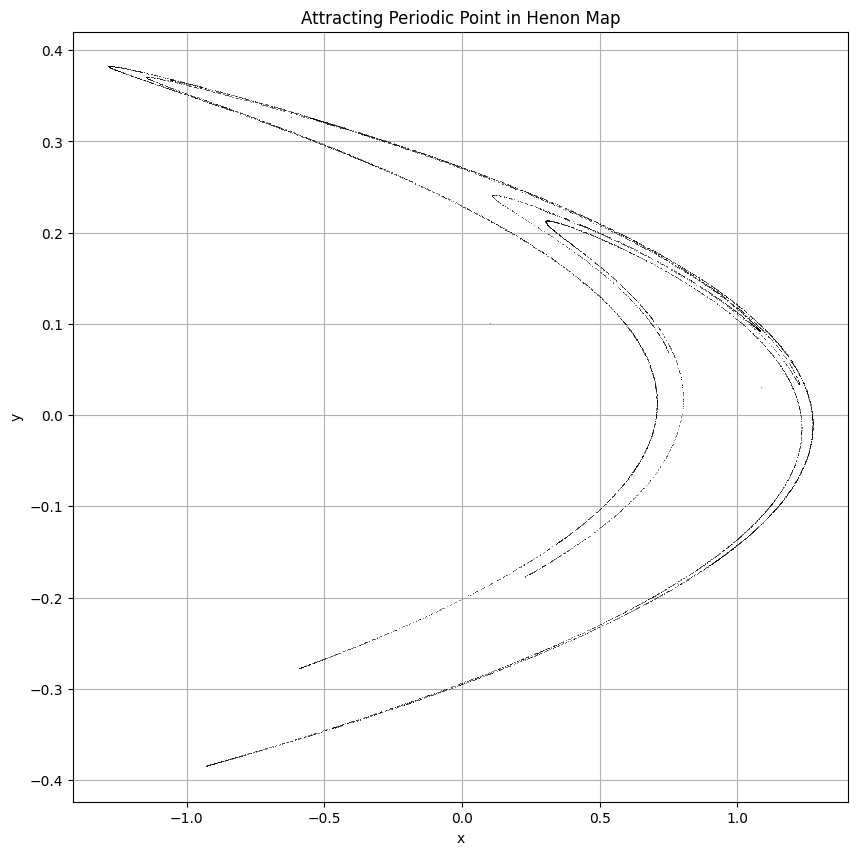

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Henon map parameters
a = 1.4
b = 0.3

# Number of iterations
n_iterations = 10000

# Initial conditions
x, y = 0.1, 0.1

# Lists to store the points
x_list = []
y_list = []

# Iterate the Henon map
for _ in range(n_iterations):
    x_list.append(x)
    y_list.append(y)
    x_new = 1 - a * x ** 2 + y
    y_new = b * x
    x, y = x_new, y_new

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(x_list, y_list, ',k', alpha=0.5)  # Use ',k' for small black points
plt.title('Attracting Periodic Point in Henon Map')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


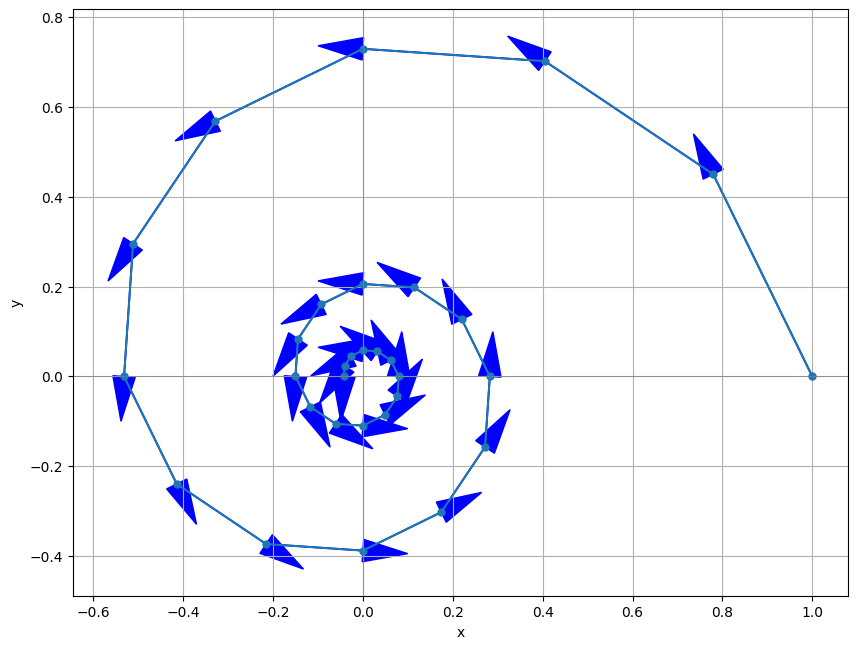

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
damping_factor = 0.9
theta = np.pi / 6  # 30 degrees rotation

# Rotation matrix with damping
A = np.array([[damping_factor * np.cos(theta), -damping_factor * np.sin(theta)],
              [damping_factor * np.sin(theta),  damping_factor * np.cos(theta)]])

# Number of iterations
n_iterations = 30

# Initial conditions
point = np.array([1, 0])
trajectory = [point]

# Iterate the transformation
for _ in range(n_iterations):
    point = A @ point
    trajectory.append(point)

trajectory = np.array(trajectory)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=5)

# Add arrows
for i in range(len(trajectory) - 1):
    plt.arrow(trajectory[i, 0], trajectory[i, 1],
              trajectory[i + 1, 0] - trajectory[i, 0],
              trajectory[i + 1, 1] - trajectory[i, 1],
              head_width=0.05, head_length=0.1, fc='blue', ec='blue')

#plt.title('Attracting Periodic Point in $\mathbb{R}^2$ with Trajectory Arrows')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


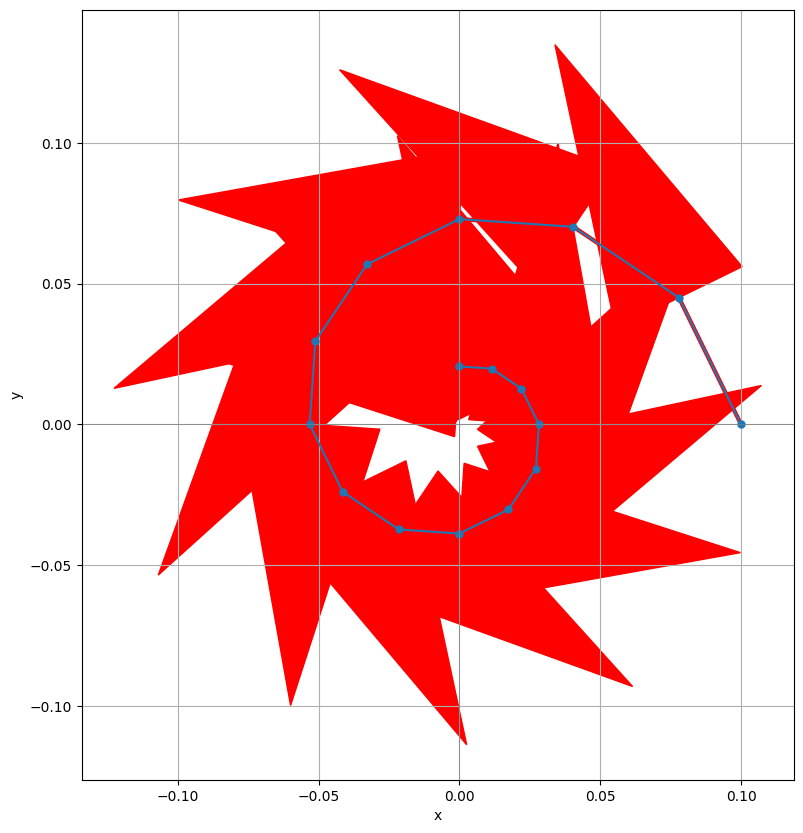

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
expansion_factor = 0.9  # Factor greater than 1 for repelling
theta = np.pi / 6  # 30 degrees rotation

# Rotation matrix with expansion
A = np.array([[expansion_factor * np.cos(theta), -expansion_factor * np.sin(theta)],
              [expansion_factor * np.sin(theta),  expansion_factor * np.cos(theta)]])

# Number of iterations
n_iterations = 15

# Initial conditions
point = np.array([0.1, 0])  # Start near the periodic point
trajectory = [point]

# Iterate the transformation
for _ in range(n_iterations):
    point = A @ point
    trajectory.append(point)

trajectory = np.array(trajectory)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=5)

# Add arrows
for i in range(len(trajectory) - 1):
    plt.arrow(trajectory[i, 0], trajectory[i, 1],
              trajectory[i + 1, 0] - trajectory[i, 0],
              trajectory[i + 1, 1] - trajectory[i, 1],
              head_width=0.05, head_length=0.1, fc='red', ec='red')

#plt.title('Trajectoire d-un point periodique attractif')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


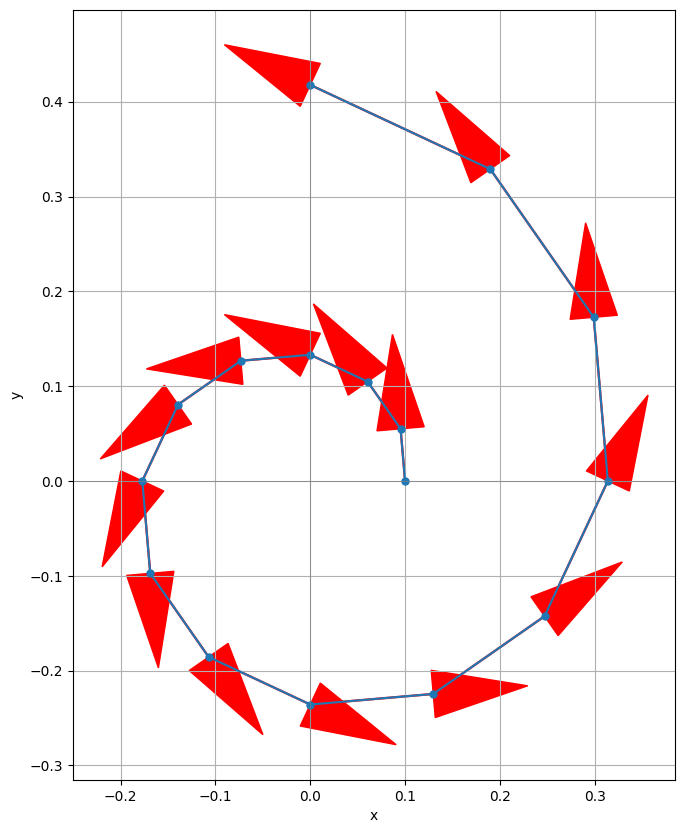

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
expansion_factor = 1.1  # Factor greater than 1 for repelling
theta = np.pi / 6  # 30 degrees rotation

# Rotation matrix with expansion
A = np.array([[expansion_factor * np.cos(theta), -expansion_factor * np.sin(theta)],
              [expansion_factor * np.sin(theta),  expansion_factor * np.cos(theta)]])

# Number of iterations
n_iterations = 15

# Initial conditions
point = np.array([0.1, 0])  # Start near the periodic point
trajectory = [point]

# Iterate the transformation
for _ in range(n_iterations):
    point = A @ point
    trajectory.append(point)

trajectory = np.array(trajectory)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=5)

# Add arrows
for i in range(len(trajectory) - 1):
    plt.arrow(trajectory[i, 0], trajectory[i, 1],
              trajectory[i + 1, 0] - trajectory[i, 0],
              trajectory[i + 1, 1] - trajectory[i, 1],
              head_width=0.05, head_length=0.1, fc='red', ec='red')

#plt.title('Trajectoire d un point periodique répulsif')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
